# KNN

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
col = ['sepal_length','sepal_width','petal_length','petal_width', 'class']
data = pd.read_csv('iris.data', header=None ,names = col)
data['class'] = data['class'].astype('category').cat.codes
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [3]:
x = data.drop('class', axis=1)
y = data['class']

In [4]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

In [5]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)
ypred = knn.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
print('Accuracy =', accuracy*100, '%')

Accuracy = 100.0 %


In [6]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [7]:
print(confusion_matrix(ytest, ypred))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


### Cross Validation

#### a) k-fold validation

In [8]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, x, y, cv=5, scoring='accuracy') # k = 5
print('Accuracy:', score.mean())
print('Standard Deviation:', np.std(score))

Accuracy: 0.9666666666666668
Standard Deviation: 0.02108185106778919


#### b) Repeated K-Fold validation

In [9]:
from sklearn.model_selection import  RepeatedKFold
cv = RepeatedKFold(n_splits = 10, n_repeats = 10, random_state = 1)
score = cross_val_score(knn, x, y, cv=cv, scoring='accuracy')
# print(score)
print('Accuracy:', score.mean())
print('Standard Deviation:', np.std(score))

Accuracy: 0.96
Standard Deviation: 0.04898979485566354


#### c) Hold-out validation (repeated)

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
cv = StratifiedShuffleSplit(n_splits=100, test_size=0.3, random_state=0)
score = cross_val_score(knn, x, y, cv=cv, scoring='accuracy')
print('Accuracy:', score.mean())
print('Standard Deviation:', np.std(score))

Accuracy: 0.9606666666666667
Standard Deviation: 0.024313792255161677


# Naive Bayes

In [11]:
from sklearn.naive_bayes import GaussianNB

In [12]:
df=data

In [13]:
x = df.drop('class', axis = 1)
y = df['class']

In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

In [15]:
clf = GaussianNB()
clf.fit(xtrain, ytrain)
ypred = clf.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
print('accuracy =', accuracy*100, '%')

accuracy = 97.77777777777777 %


In [16]:
print(classification_report(ytest, ypred, zero_division=True))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [17]:
print(confusion_matrix(ytest, ypred))

[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


# Decision Tree Classifier

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
df = data

In [20]:
x = df.drop('class', axis=1)
y = df['class']

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

## Using Entropy 

In [22]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=100, max_depth=3, min_samples_leaf=3)
clf.fit(xtrain, ytrain)
ypred = clf.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
print('Accuracy =', accuracy*100, '%')

Accuracy = 100.0 %


In [23]:
print(classification_report(ytest, ypred, zero_division=True))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [24]:
print(confusion_matrix(ytest, ypred))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


## Using Gini Index

In [25]:
clf = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=3, min_samples_leaf=3)
clf.fit(xtrain, ytrain)
ypred = clf.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
print('Accuracy =', accuracy*100, '%')

Accuracy = 100.0 %


In [26]:
print(classification_report(ytest, ypred, zero_division=True))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [27]:
print(confusion_matrix(ytest, ypred))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


# Linear Regression

In [28]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

## Linear Regression on Boston Data

In [29]:
boston = load_boston(return_X_y=False)
x = boston.data
y = boston.target

In [30]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.4, random_state=1)

In [31]:
reg = LinearRegression()
reg.fit(xtrain, ytrain)
ypred = reg.predict(xtest)
print('Coefficients: ', reg.coef_)
print('Variance score: ', reg.score(xtest, ytest))

Coefficients:  [-8.95714048e-02  6.73132853e-02  5.04649248e-02  2.18579583e+00
 -1.72053975e+01  3.63606995e+00  2.05579939e-03 -1.36602886e+00
  2.89576718e-01 -1.22700072e-02 -8.34881849e-01  9.40360790e-03
 -5.04008320e-01]
Variance score:  0.7209056672661754


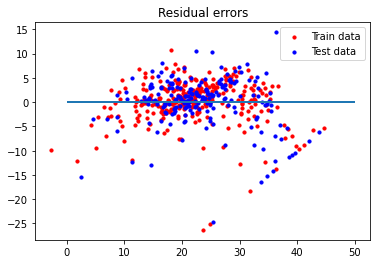

In [32]:
plt.scatter(reg.predict(xtrain), reg.predict(xtrain) - ytrain, color = 'r', s = 10, label = 'Train data')
plt.scatter(reg.predict(xtest), reg.predict(xtest) - ytest, color = 'b', s = 10, label = 'Test data')

plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.show()

## Linear Regression On Advertising Data

In [33]:
df = pd.read_csv('advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [34]:
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

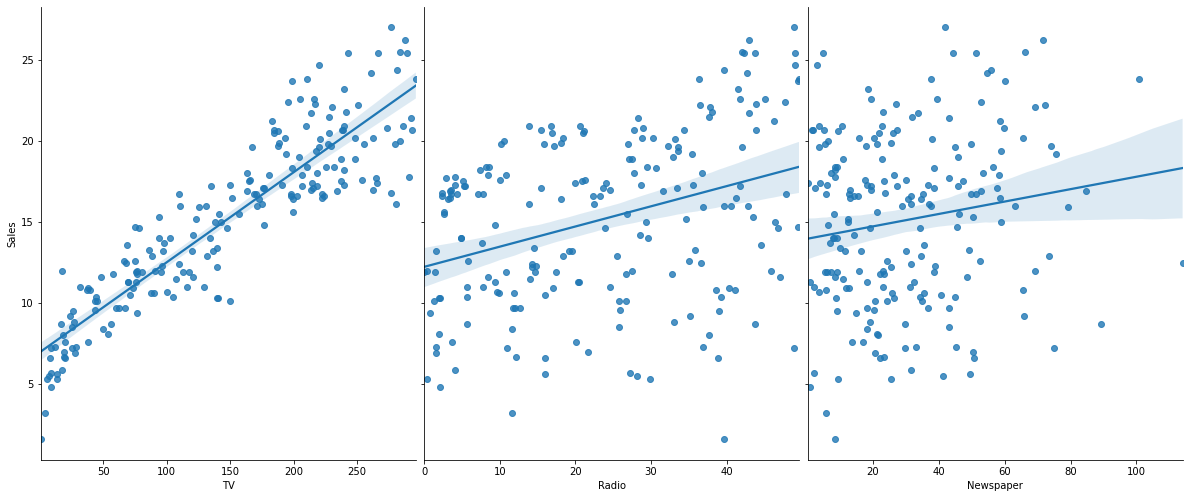

In [35]:
col = ['TV', 'Radio', 'Newspaper']
sns.pairplot(df, x_vars=col, y_vars=['Sales'], height=7, aspect=0.8, kind='reg',diag_kind=None)

In [36]:
x, y = df.drop('Sales', axis=1), df['Sales']

In [37]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=1)

In [38]:
# y = alpha + beta*x
reg = LinearRegression()
reg.fit(xtrain, ytrain)
ypred = reg.predict(xtest)
alpha = reg.intercept_
beta = reg.coef_
print('Variance:', reg.score(xtest, ytest))

Variance: 0.9048917241361681


In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('Mean Absolute Error:', mean_absolute_error(ytest, ypred))
print('Mean Squared Error:', mean_squared_error(ytest, ypred))
print('Root Mean Squared Error', np.sqrt(mean_squared_error(ytest, ypred)))

Mean Absolute Error: 1.2187904107011895
Mean Squared Error: 2.2789251586850003
Root Mean Squared Error 1.5096109295725837


In [40]:
print(alpha, beta)

4.633808551125243 [0.05483762 0.10218027 0.00078783]


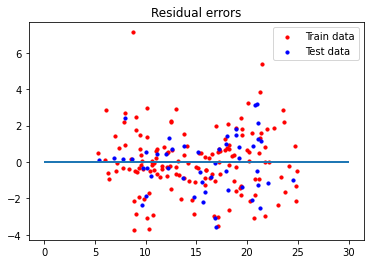

In [41]:
plt.scatter(reg.predict(xtrain), reg.predict(xtrain) - ytrain, color = 'r', s = 10, label = 'Train data')
plt.scatter(reg.predict(xtest), reg.predict(xtest) - ytest, color = 'b', s = 10, label = 'Test data')

plt.hlines(y = 0, xmin = 0, xmax = 30, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.show()

# K-Means

In [42]:
from sklearn.cluster import KMeans

In [43]:
df = pd.DataFrame({
    'x': [12,20,28,18,29,33,24,45,45,52,51,52,55,53,55,61,64,69,72],
    'y': [39,36,30,52,54,46,55,59,63,70,66,63,58,23,14, 8,19, 7,24]
})
km = KMeans(n_clusters=3)
km.fit(df)
labels = km.predict(df)
centroids = km.cluster_centers_

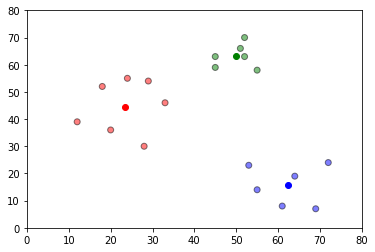

In [44]:
colmap = {1:'r', 2: 'b', 3:'g'}
colors = list(map(lambda x:colmap[x+1], labels))

plt.scatter(df['x'], df['y'], color=colors, alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color = colmap[idx+1])

plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()